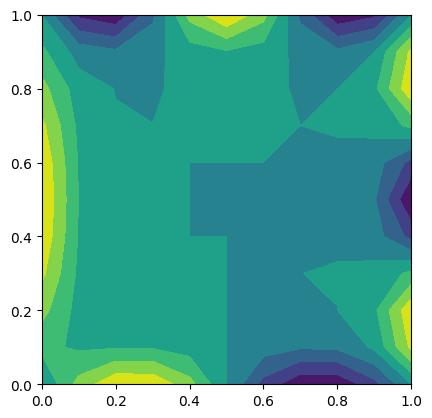

In [ ]:
#Solution of the Laplacian

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib


n=3 #number of iterations, for 10000 iterations the run takes about 1 minute.

nx=11 #x resolution
ny=11 #y resolution

Psi=np.zeros((nx,ny))
L=np.zeros((nx,ny))
Result=np.zeros((3,nx*ny))

x=np.zeros(nx)
y=np.zeros(ny)

x_min=0.
x_max=1.

y_min=0.
y_max=1.

dx=(x_max-x_min)/(nx-1)
dy=(y_max-y_min)/(ny-1)


#Setting the values of x and y

for i in range(0,nx):
    x[i]=i*dx

for i in range(0,ny):
    y[i]=i*dy

#Boundary conditions Psi(x,y_min)=sin(2*Pi*x)
#Boundary conditions Psi(x,y_max)=sin(3*Pi*x)
for i in range(0,nx):
    Psi[i, 0]=np.sin(2.*np.pi*x[i])
    Psi[i, ny-1]=-np.sin(3.*np.pi*x[i])


#Boundary conditions Psi(x_min,y)=sin(Pi*x)
#Boundary conditions Psi(x_max,y)=sin(3*Pi*x)
for i in range(0,nx):
    Psi[0, i]=np.sin(np.pi*x[i])
    Psi[nx-1, i]=np.sin(3.*np.pi*x[i])


#Solution of Laplace's Equation: dxx Psi+dyy Psi=0

for k in range(0, n):

    #In this loop we evaluate the derivatives
    for i in range (1, nx-1):
        for j in range(1, ny-1):
            dxxPsi=(Psi[i+1,j]-2*Psi[i,j]+Psi[i-1,j])/dx**2
            dyyPsi=(Psi[i,j+1]-2*Psi[i,j]+Psi[i,j-1])/dy**2

            L[i,j]=dxxPsi+dyyPsi

    #In this loop we evaluate the new value of Psi

    for i in range (1, nx-1):
        for j in range(1, ny-1):

            Psi[i,j]=Psi[i,j]+L[i,j]*dx*dy*0.1


#In this loop we save the results in a single array

for i in range(0,nx):
    for j in range(0, ny):
        k=i*nx+j
        Result[0, k]=x[i]
        Result[1, k]=y[j]
        Result[2, k]=Psi[i,j]

#Here we plot the results

X= Result[0, :].reshape(nx,ny)
Y= Result[1, :].reshape(nx,ny)
Z= Result[2, :].reshape(nx,ny)

fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(1,1,1, aspect=1, xlim=[x_min, x_max], ylim=[y_min, y_max])

ax1 = ax1.contourf(X,Y,Z)

plt.show()
